# Exploratory Analysis & Flood Severity Modeling for Mumbai #

This notebook analyzes flood risk in Mumbai using with some manually generated data and machine learning model(random forest).


### Importing required libraries ###

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
data = pd.read_csv('python/flood_aid_dataset_mumbai.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             80 non-null     object 
 1   Latitude                             80 non-null     float64
 2   Longitude                            80 non-null     float64
 3   Elevation (m)                        80 non-null     int64  
 4   Land Use Type                        80 non-null     object 
 5   Flood Severity (1-10)                80 non-null     int64  
 6   Population Density (people/sq.km)    80 non-null     int64  
 7   Vulnerable Population (%)            80 non-null     float64
 8   Rainfall (mm)                        80 non-null     int64  
 9   Water Level Rise (m)                 80 non-null     float64
 10  Flood Duration (days)                80 non-null     int64  
 11  Infrastructure Damage (Million $) 

In [5]:
data.describe()

,Latitude,Longitude,Elevation (m),Flood Severity (1-10),Population Density (people/sq.km),Vulnerable Population (%),Rainfall (mm),Water Level Rise (m),Flood Duration (days),Infrastructure Damage (Million $),...,Psychological Distress Level (1-10),Response Time (Hours),Resource Wastage (%),Food Supply (Tons),Water Supply (Liters),Evacuation Boats,Medical Aid Kits,Relief Camps Set Up,Hospital Functionality (%),Emergency Shelters Capacity
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,19.079902,72.861953,23.77500,7.200000,18160.812500,36.171875,1666.287500,2.717125,5.625000,256.161625,...,4.662500,23.475000,14.563000,2636.387500,509901.912500,25.012500,470.525000,49.937500,74.930125,4445.600000
std,0.100786,0.068254,13.56277,1.686882,8495.636009,15.285481,684.753512,1.308806,2.587091,127.813657,...,2.550472,14.264211,7.639167,1341.416005,276780.423949,13.574449,283.399391,25.413713,15.454335,2827.291711
min,18.901085,72.750856,0.00000,5.000000,3417.000000,10.300000,551.000000,0.540000,1.000000,20.650000,...,1.000000,1.000000,1.290000,112.000000,13212.000000,1.000000,10.000000,2.000000,50.050000,122.000000
25%,18.996064,72.804773,13.75000,6.000000,11273.000000,23.792500,1082.500000,1.555000,4.000000,145.955000,...,2.000000,10.750000,8.530000,1550.250000,282953.250000,13.750000,209.250000,28.000000,61.582500,1939.000000
50%,19.072994,72.853762,23.00000,7.000000,18585.000000,36.745000,1559.500000,2.825000,6.000000,281.515000,...,5.000000,23.500000,14.615000,2630.500000,529862.500000,24.500000,472.500000,47.500000,74.510000,4300.000000
75%,19.174356,72.912609,35.25000,9.000000,26148.250000,49.300000,2126.750000,3.800000,8.000000,347.410000,...,7.000000,37.000000,19.912500,3677.250000,710760.500000,38.000000,687.500000,74.000000,88.340000,6911.000000
max,19.260700,72.978989,49.00000,10.000000,29794.000000,59.940000,2956.000000,4.980000,9.000000,477.510000,...,9.000000,47.000000,29.010000,4977.000000,985491.000000,48.000000,990.000000,98.000000,99.260000,9908.000000


In [7]:
data

,Location,Latitude,Longitude,Elevation (m),Land Use Type,Flood Severity (1-10),Population Density (people/sq.km),Vulnerable Population (%),Rainfall (mm),Water Level Rise (m),...,Psychological Distress Level (1-10),Response Time (Hours),Resource Wastage (%),Food Supply (Tons),Water Supply (Liters),Evacuation Boats,Medical Aid Kits,Relief Camps Set Up,Hospital Functionality (%),Emergency Shelters Capacity
0,Location_1,19.018344,72.826646,26,Residential,5,12164,34.26,1487,1.77,...,1,39,12.61,3445,933469,46,86,80,64.67,1143
1,Location_2,19.049011,72.886861,46,Slum,9,20177,58.69,1302,1.48,...,3,8,26.24,266,218072,42,963,39,51.67,3142
2,Location_3,19.083245,72.770745,15,Industrial,8,24841,10.41,2849,2.85,...,9,45,11.42,3366,258029,12,742,45,90.79,914
3,Location_4,19.071166,72.889383,5,Commercial,5,29794,54.94,1026,1.20,...,9,24,18.41,1409,219047,1,914,78,72.52,5722
4,Location_5,18.992856,72.770615,32,Slum,9,26509,56.56,2165,3.50,...,7,28,4.42,3824,985491,17,803,81,66.26,7432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Location_76,19.141904,72.812188,17,Slum,5,28486,24.08,1114,4.70,...,9,39,22.07,1069,788559,27,472,19,79.16,1585
76,Location_77,19.213965,72.934815,34,Industrial,6,12713,34.03,1061,4.72,...,5,3,15.79,1334,973615,28,739,48,61.50,5449
77,Location_78,18.988017,72.978989,19,Slum,8,24159,32.40,2921,4.61,...,2,2,19.04,112,493663,18,39,35,57.41,7295
78,Location_79,19.076775,72.808112,14,Slum,5,5849,16.04,1121,2.96,...,4,6,12.47,2580,438082,16,482,32,82.69,7850


#### Dropping (dtype = object) columns from dataframe so as to operate further ####

In [8]:
data_encoded = pd.get_dummies(data, columns=['Land Use Type'], drop_first=True)

###  Visualizing the Impact of Continuous Features on Flood Severity  ###

In this section, we analyze how different continuous variables influence flood severity by plotting scatter plots for each feature.  


- We have a list of **continuous features** that represent various environmental, social, and economic factors contributing to flood severity.  
- For each feature, we create a **scatter plot** with:  
  - The **X-axis** representing the feature values.  
  - The **Y-axis** representing **Flood Severity (1-10)**.  
  - Points are **color-coded** using a colormap (`coolwarm`) to visually indicate flood severity levels.  
- A **color bar** is added to help interpret flood severity distribution across different feature values.  
- This visualization helps in identifying trends, correlations, and potential thresholds that significantly impact flood severity.  

- **Positive or Negative Trends:** Some features (e.g., rainfall, water level rise) might show an increasing trend with flood severity, while others (e.g., hospital functionality) might show a decreasing trend.  
- **Non-linear Relationships:** Certain features may not have a straightforward linear effect but could exhibit threshold effects or diminishing returns.  
- **Outliers & Anomalies:** Scatter plots help in detecting extreme values that might need special attention during analysis.  


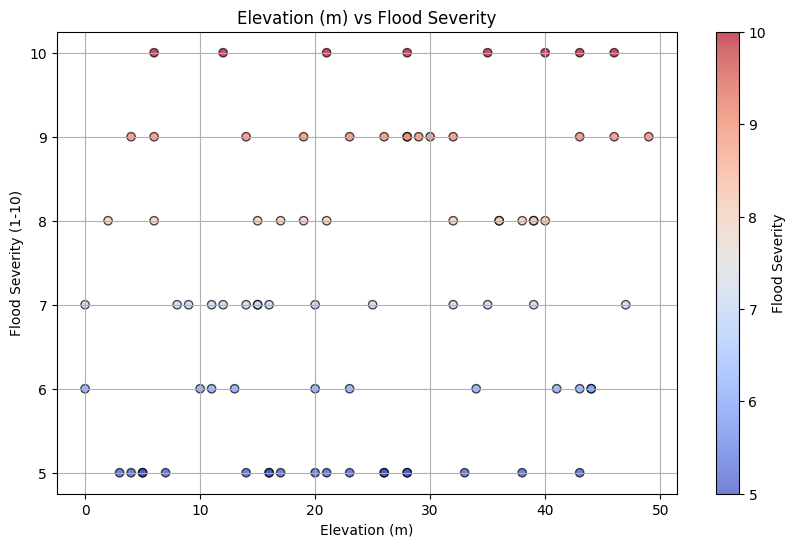

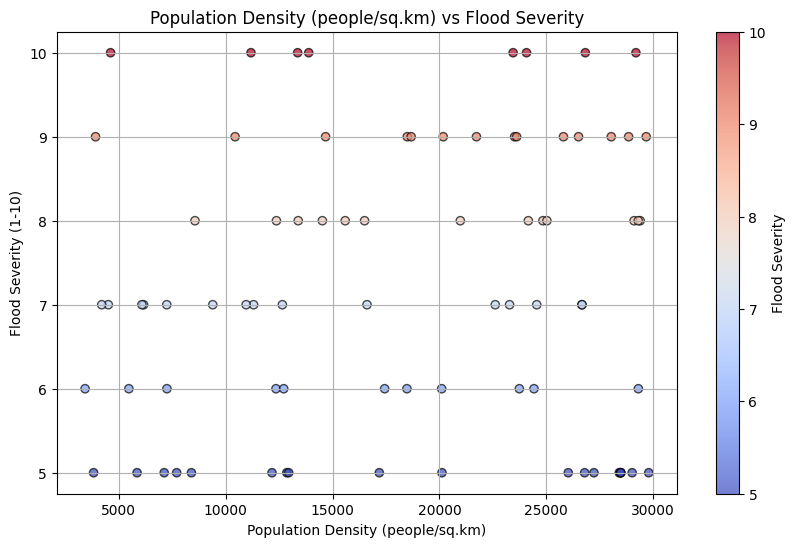

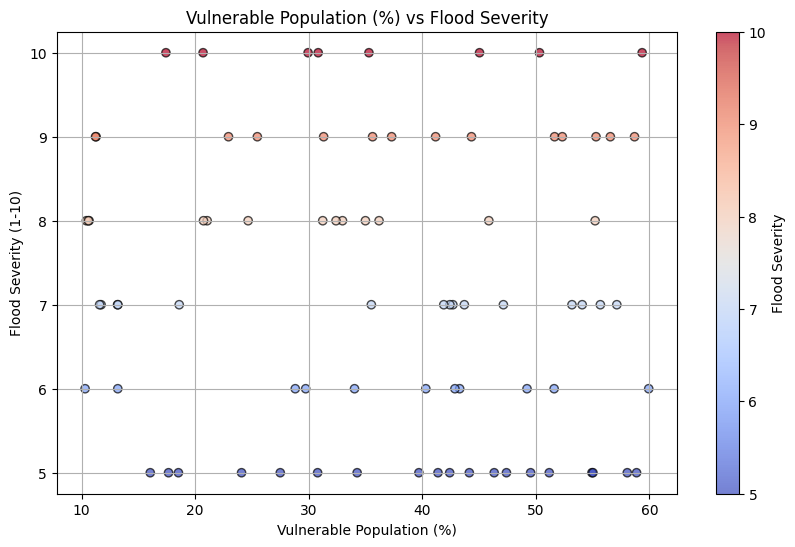

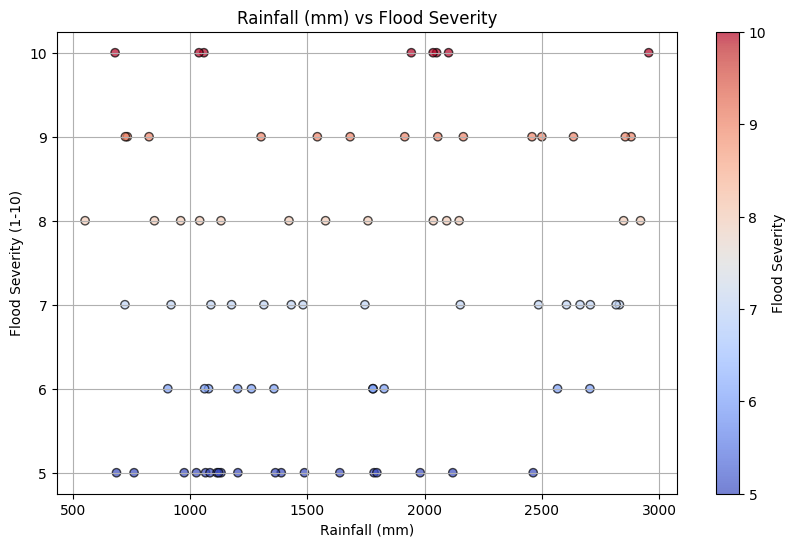

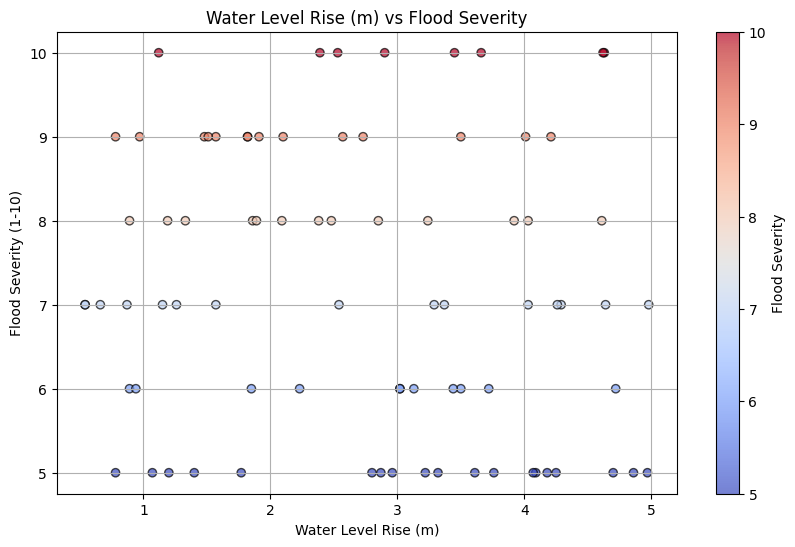

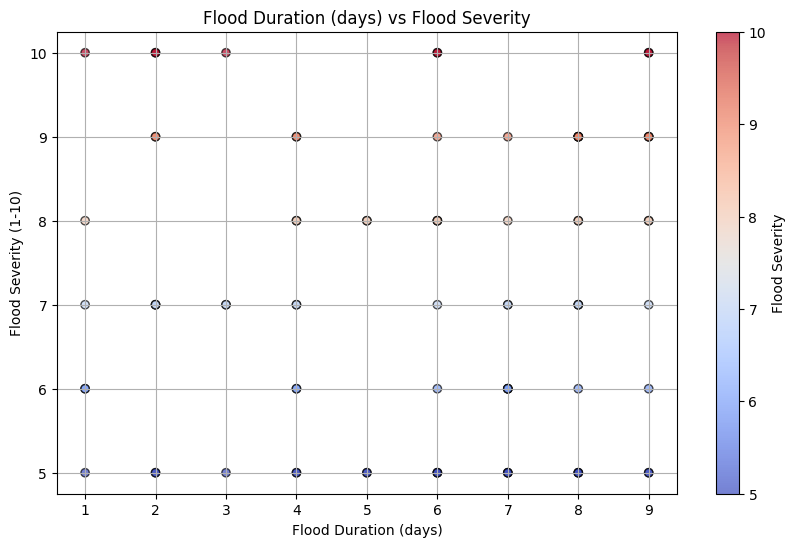

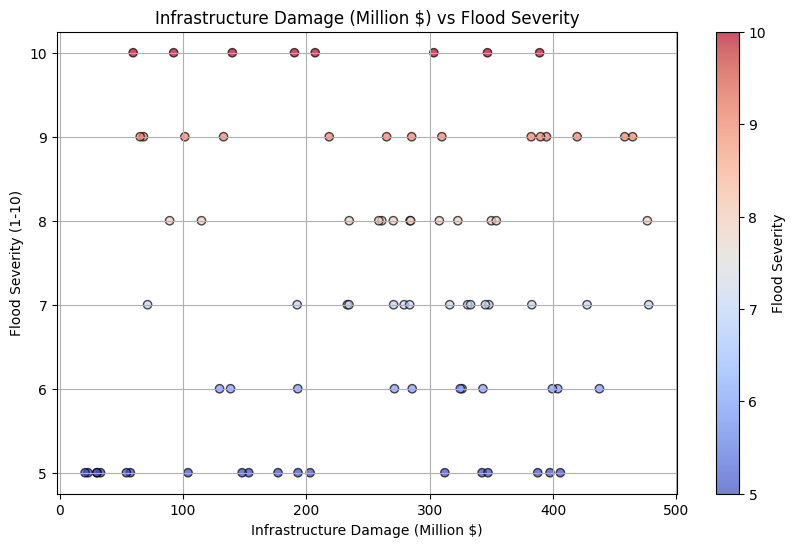

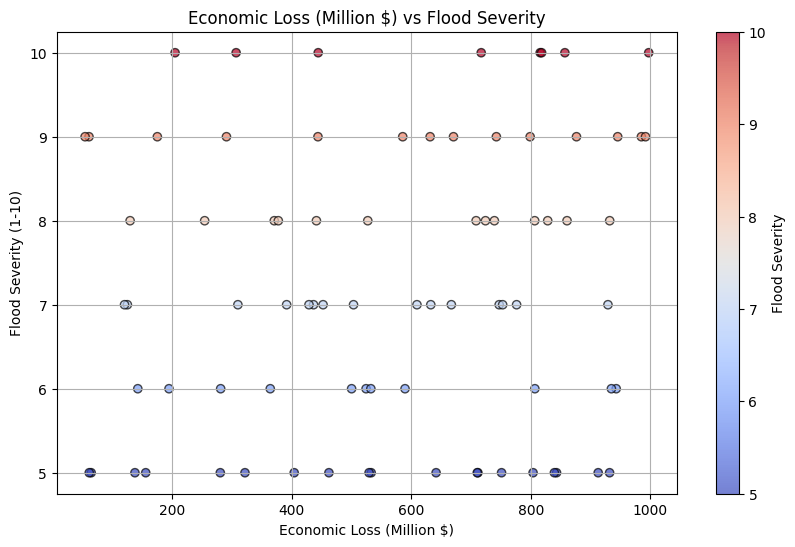

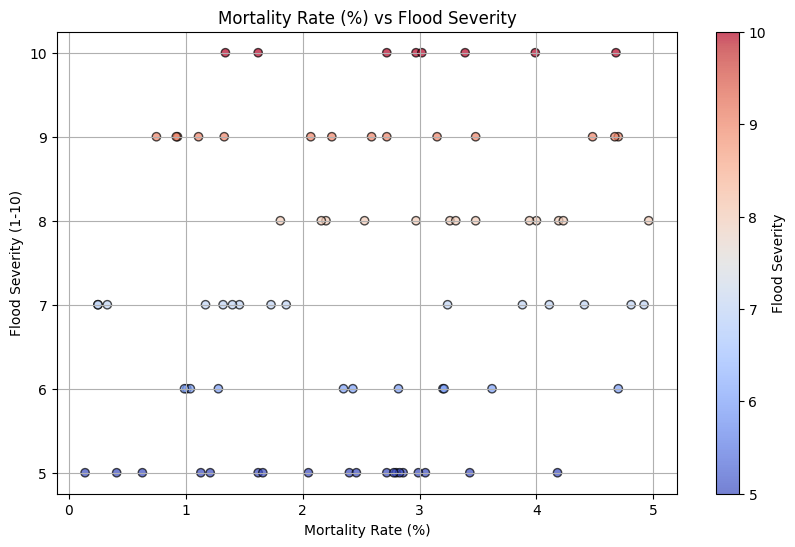

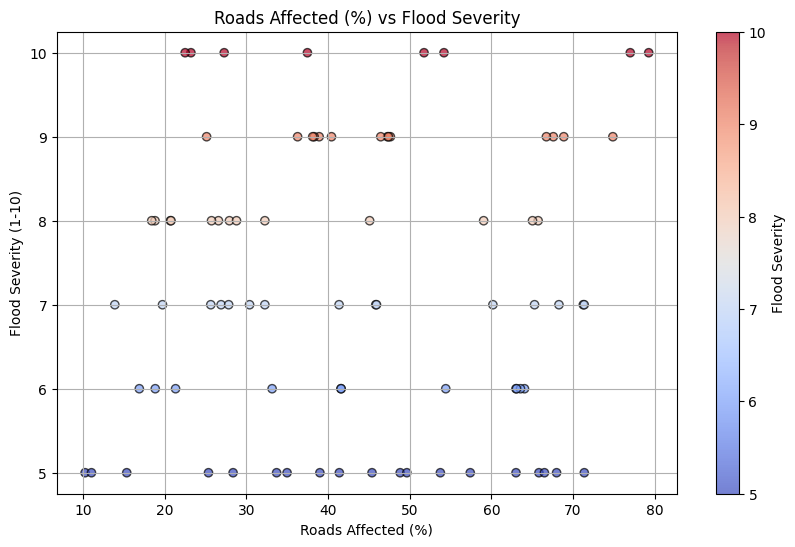

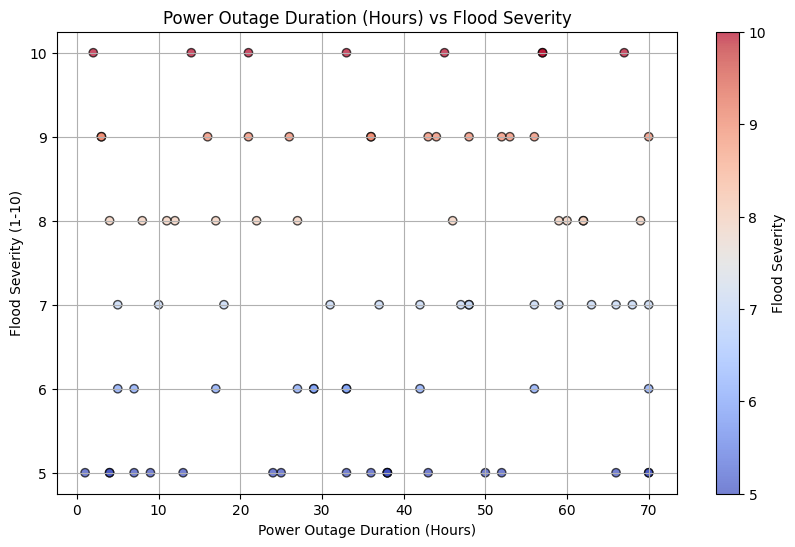

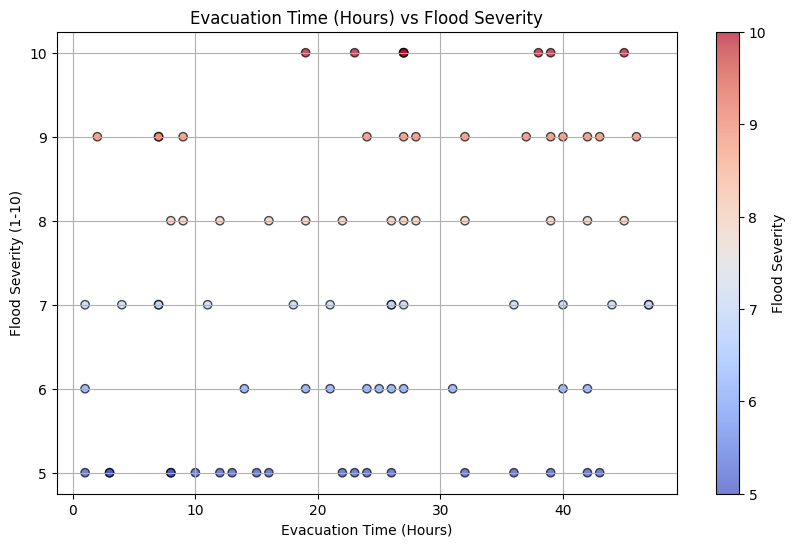

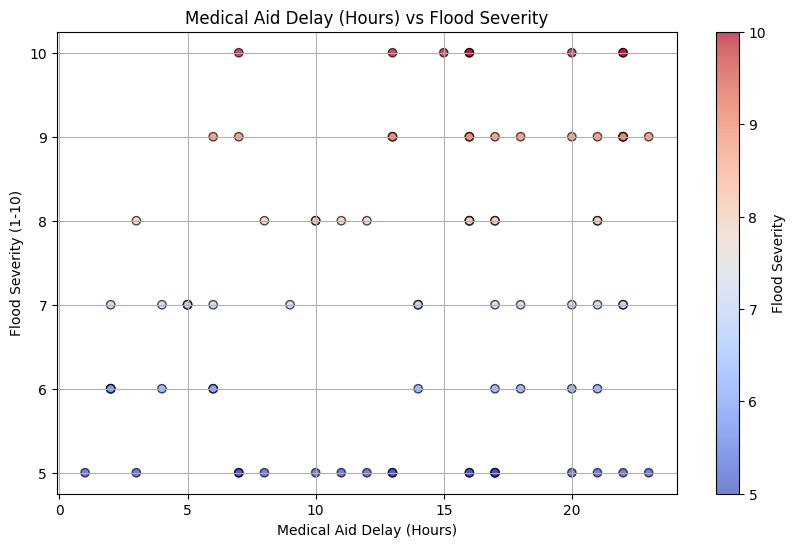

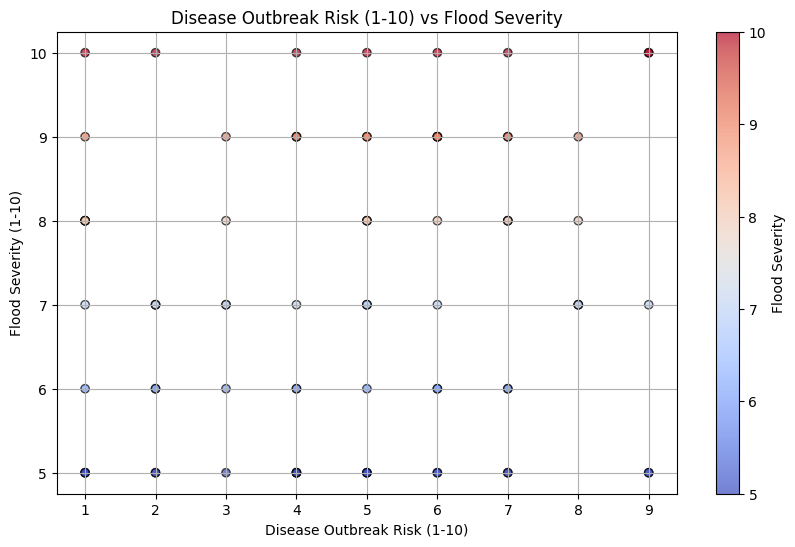

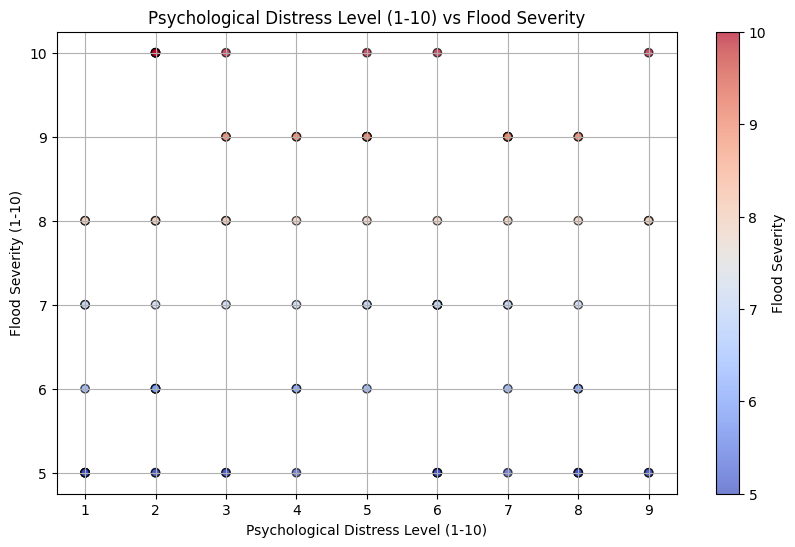

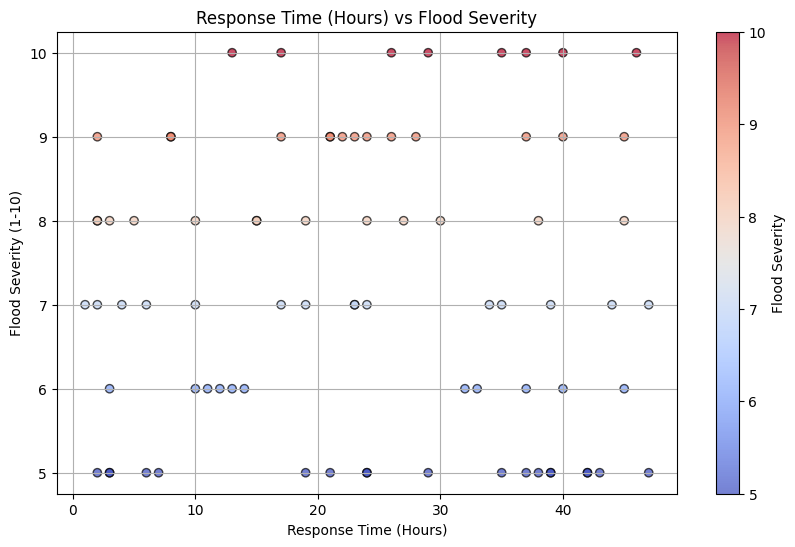

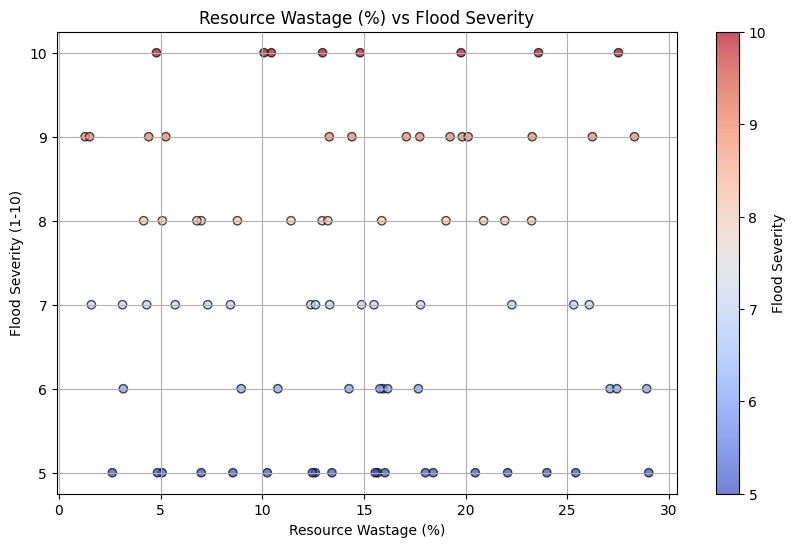

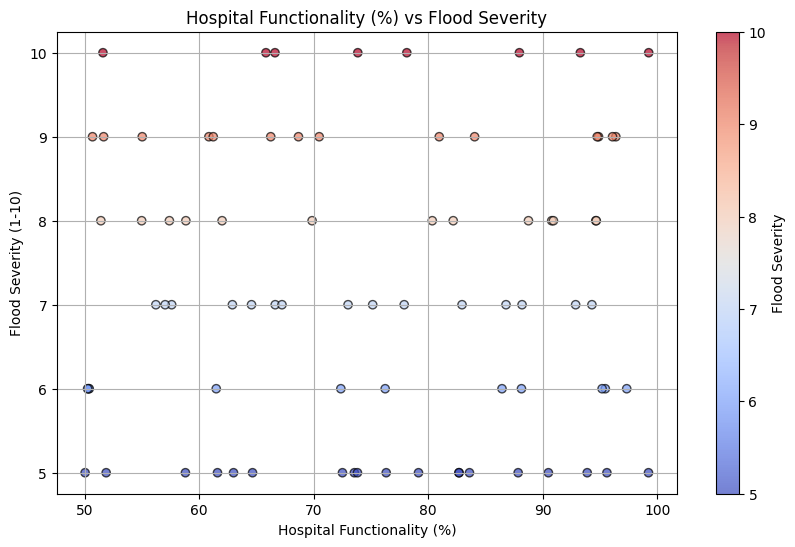

In [9]:
continuous_features = [
    "Elevation (m)", "Population Density (people/sq.km)", "Vulnerable Population (%)", "Rainfall (mm)",
    "Water Level Rise (m)", "Flood Duration (days)", "Infrastructure Damage (Million $)", "Economic Loss (Million $)",
    "Mortality Rate (%)", "Roads Affected (%)", "Power Outage Duration (Hours)", "Evacuation Time (Hours)",
    "Medical Aid Delay (Hours)", "Disease Outbreak Risk (1-10)", "Psychological Distress Level (1-10)",
    "Response Time (Hours)", "Resource Wastage (%)", "Hospital Functionality (%)"
]


for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sc = plt.scatter(data[feature], data['Flood Severity (1-10)'], c=data['Flood Severity (1-10)'], cmap='coolwarm', alpha=0.7, edgecolor='k')
    plt.colorbar(sc, label='Flood Severity')
    plt.title(f'{feature} vs Flood Severity')
    plt.xlabel(feature)
    plt.ylabel('Flood Severity (1-10)')
    plt.grid(True)
    plt.show()

###  Boxplot Analysis: Impact of Continuous Features on Flood Severity  ###

In this section, we visualize how various continuous features relate to different flood severity levels using **boxplots**.  

- For each continuous feature, we generate a **boxplot** grouped by **Flood Severity (1-10)** to observe the distribution of values at different severity levels.  
- The boxplot provides key statistical insights:  
  - **Median (Central Line in Box):** Represents the middle value of the feature for a given flood severity level.  
  - **Interquartile Range (Box Edges):** Shows the range where 50% of the data lies, helping to understand variability.  
  - **Whiskers:** Extend to the minimum and maximum data points within a defined range.  
  - **Outliers (Dots beyond Whiskers):** Highlight extreme values that may require further investigation.  

- **Detect Variability:** Some features (e.g., rainfall, economic loss) may show high variation across different flood severities.  
- **Compare Medians:** We can assess whether median values of a feature increase or decrease as flood severity rises.  
- **Identify Outliers:** Certain data points may indicate unusual events or reporting errors.  

This analysis helps us identify **key risk factors** contributing to flood severity, guiding better mitigation strategies. 

<Figure size 1000x600 with 0 Axes>

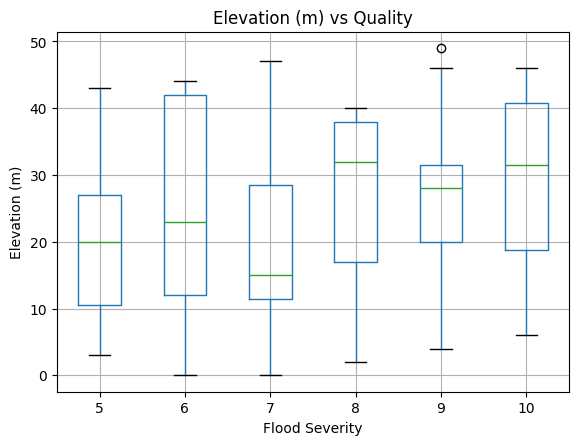

<Figure size 1000x600 with 0 Axes>

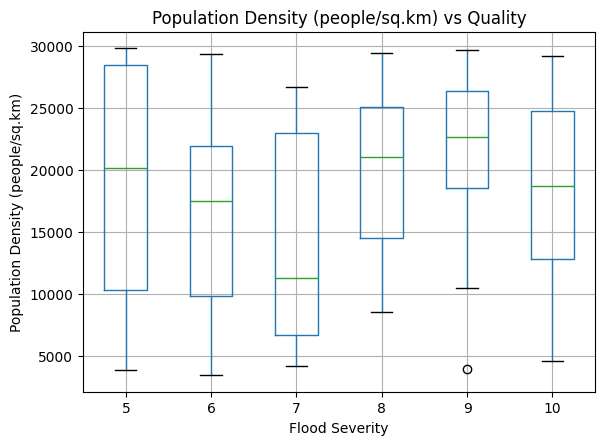

<Figure size 1000x600 with 0 Axes>

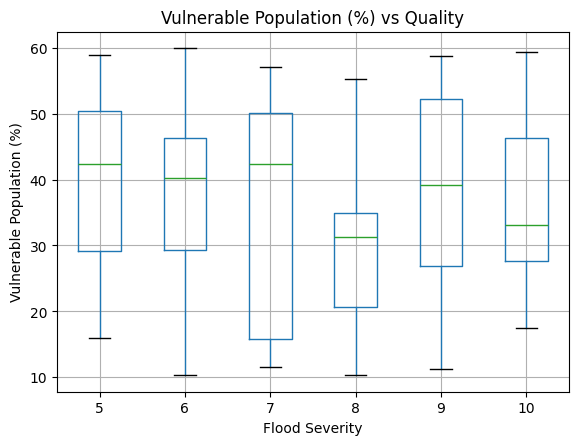

<Figure size 1000x600 with 0 Axes>

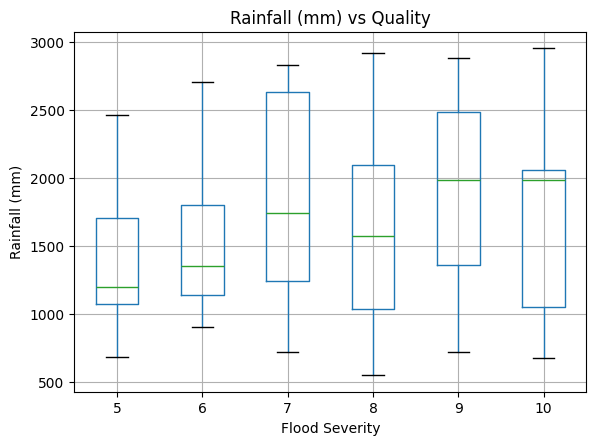

<Figure size 1000x600 with 0 Axes>

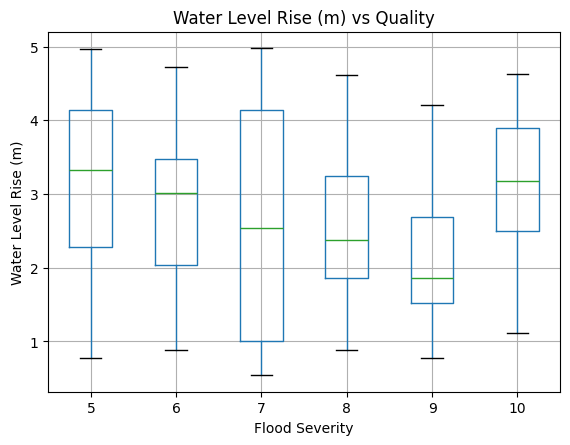

<Figure size 1000x600 with 0 Axes>

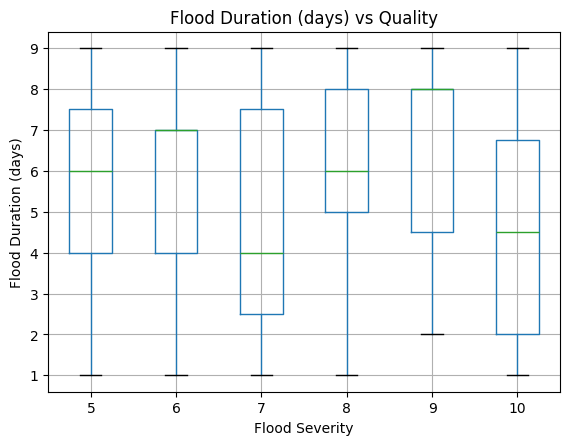

<Figure size 1000x600 with 0 Axes>

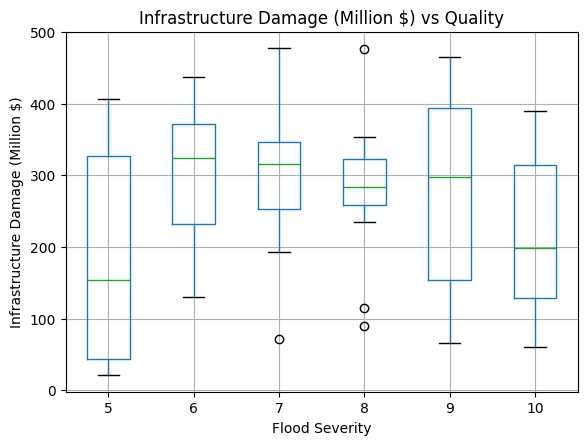

<Figure size 1000x600 with 0 Axes>

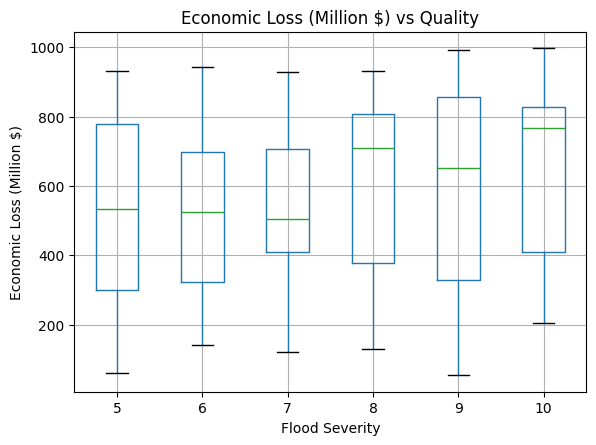

<Figure size 1000x600 with 0 Axes>

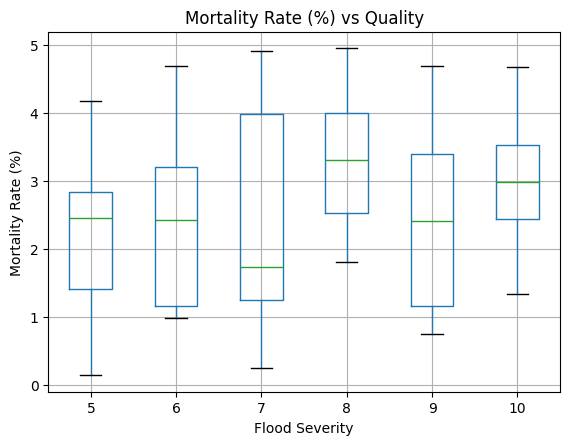

<Figure size 1000x600 with 0 Axes>

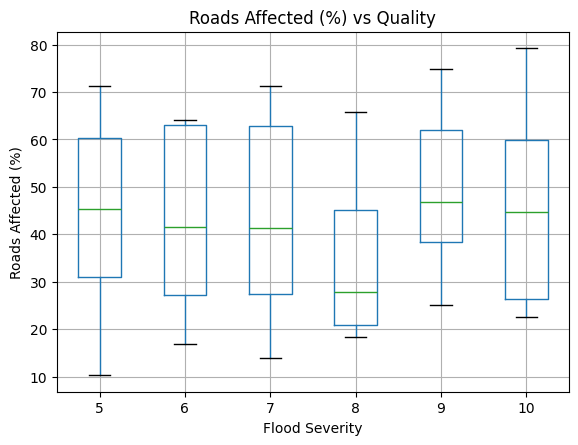

<Figure size 1000x600 with 0 Axes>

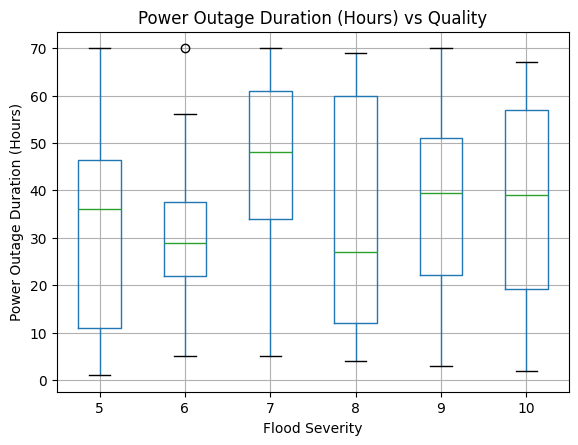

<Figure size 1000x600 with 0 Axes>

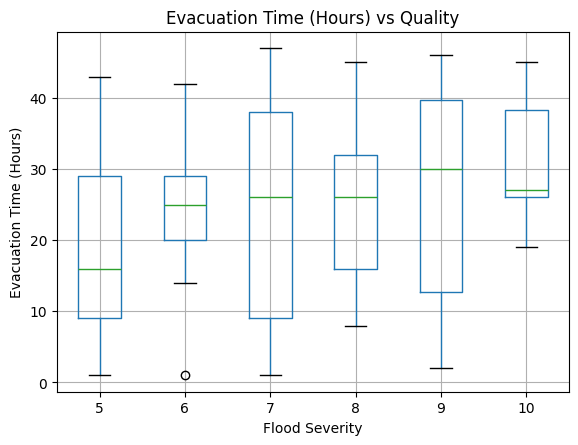

<Figure size 1000x600 with 0 Axes>

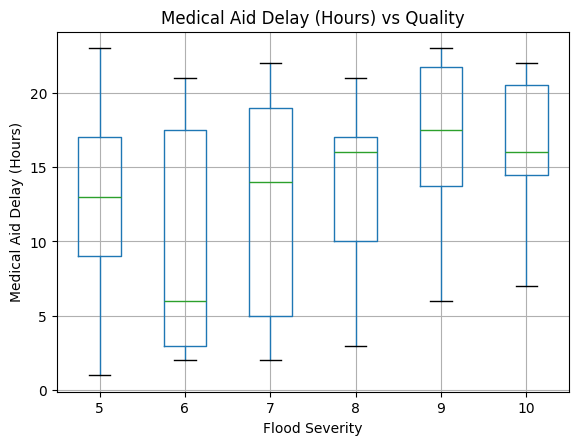

<Figure size 1000x600 with 0 Axes>

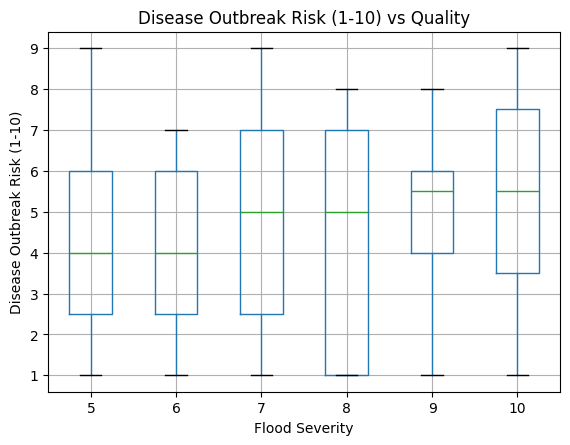

<Figure size 1000x600 with 0 Axes>

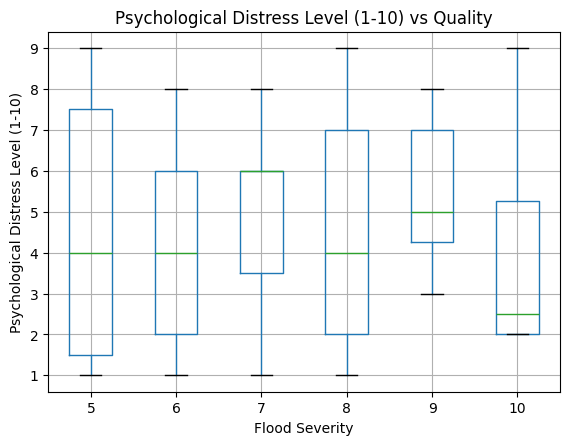

<Figure size 1000x600 with 0 Axes>

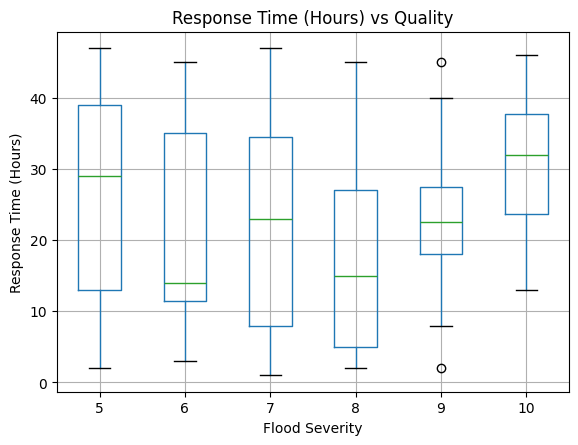

<Figure size 1000x600 with 0 Axes>

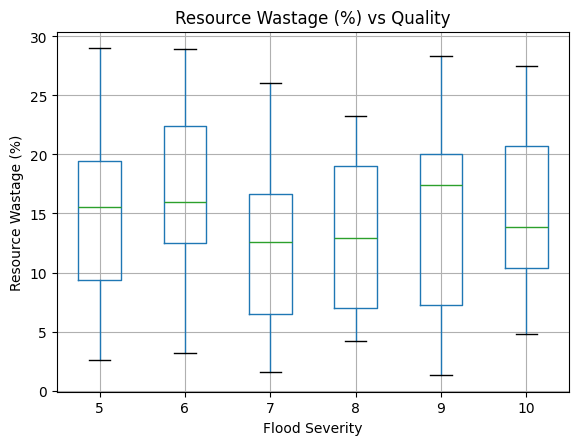

<Figure size 1000x600 with 0 Axes>

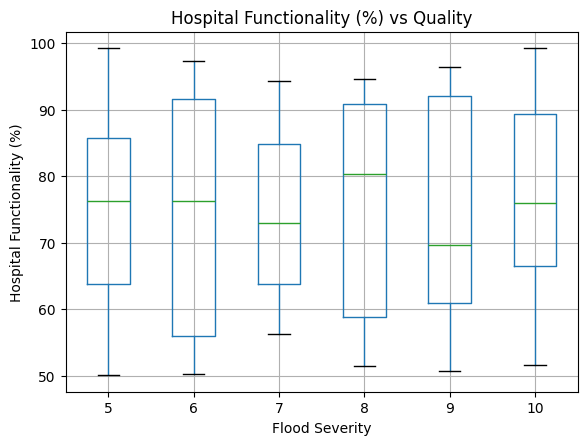

In [10]:
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=feature, by='Flood Severity (1-10)', grid=False, showfliers=True)
    plt.title(f'{feature} vs Quality')
    plt.suptitle('') 
    plt.xlabel('Flood Severity')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

###  Correlation Matrix: Understanding Feature Relationships ###  

In this section, we generate a **correlation heatmap** to analyze relationships between different numerical features in the dataset.  

- We first **select only numerical features** from the dataset to compute their correlation.  
- The **correlation matrix** shows how strongly each feature is related to another, with values ranging from **-1 to 1**:  
  - **+1:** Perfect positive correlation (as one increases, the other increases).  
  - **0:** No correlation (the two features are independent).  
  - **-1:** Perfect negative correlation (as one increases, the other decreases).  
- The **heatmap** visually represents these correlations, with:  
  - **Red shades:** Strong positive correlations.  
  - **Blue shades:** Strong negative correlations.  
  - **Lighter shades:** Weak or no correlation.  

- **Strong correlations with flood severity:** Identify the most influential factors (e.g., rainfall, water level rise, infrastructure damage).  
- **Multicollinearity:** Highly correlated independent variables may require dimensionality reduction (e.g., PCA) or feature selection.  
- **Unexpected relationships:** Some correlations may indicate hidden dependencies or data biases.  

This heatmap helps refine feature selection for modeling and improves understanding of flood risk dynamics. 

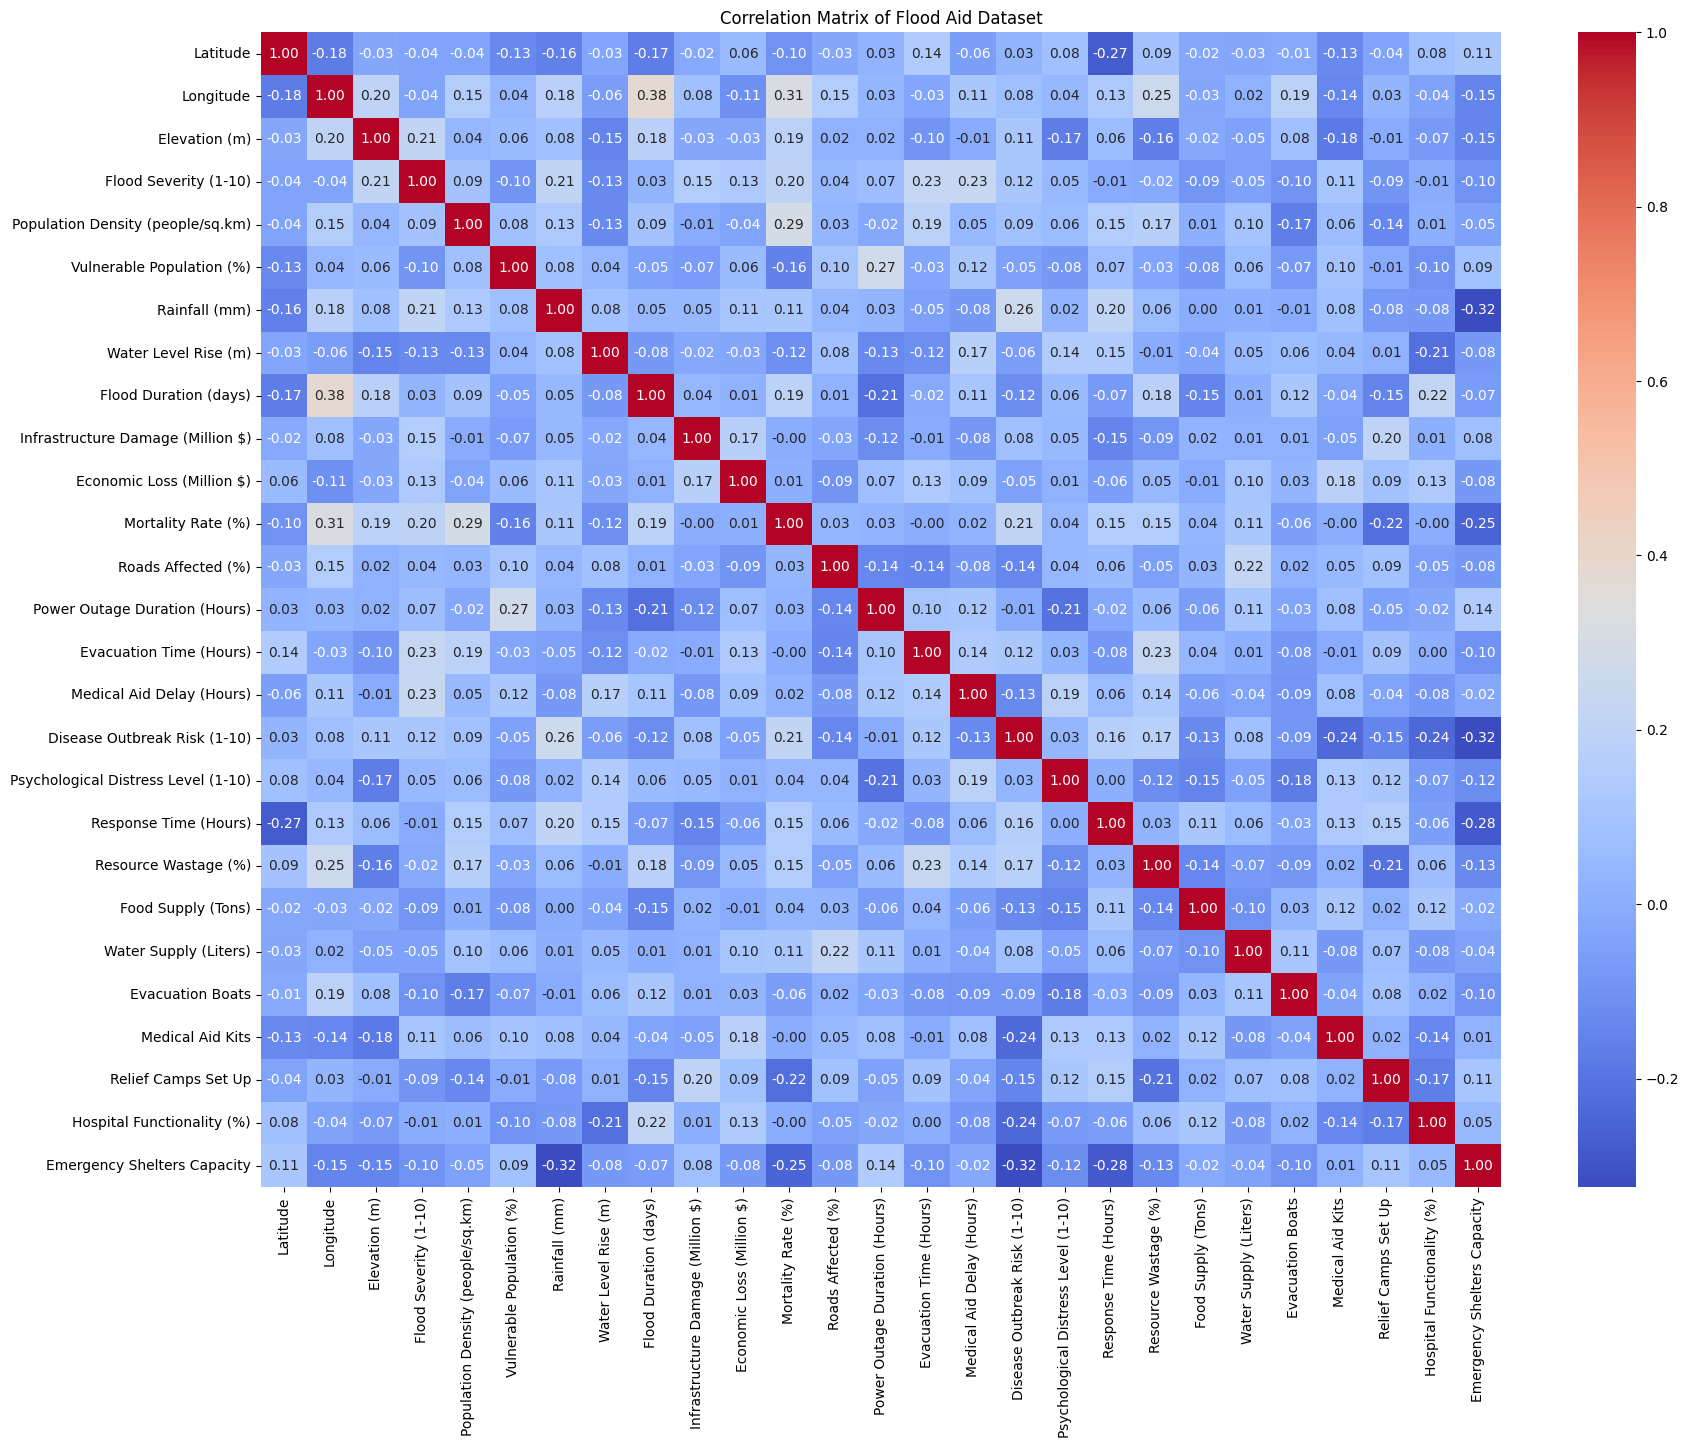

In [11]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Flood Aid Dataset')
plt.show()

###  Scatter Plot: Response Time vs Flood Severity ### 

In this section, we visualize the relationship between **Response Time (Hours)** and **Flood Severity (1-10)** using a scatter plot.  

- The **X-axis** represents **Response Time (Hours)**—the duration taken for emergency response after a flood event.  
- The **Y-axis** represents **Flood Severity (1-10)**—a numerical measure of flood impact.  
- **Color-coding (hue)**: The scatter points are color-coded based on flood severity using the `coolwarm` colormap, making it easier to observe trends.  
- **Edgecolor (`k`)**: Enhances visibility of individual data points.  

- **Trend Analysis:**  
  - If **higher response times correspond to higher flood severity**, it may indicate **delayed responses worsen flood impact**.  
  - If **no clear trend is visible**, response time might not be a primary factor influencing flood severity.  
- **Clusters & Outliers:**  
  - Clusters of **low response time with low severity** may indicate efficient disaster management.  
  - Outliers where **high response time leads to low severity** may indicate other mitigating factors (e.g., early warnings, strong infrastructure).  

This analysis helps assess the **efficacy of emergency response systems** and highlights areas for improvement in disaster management strategies. 

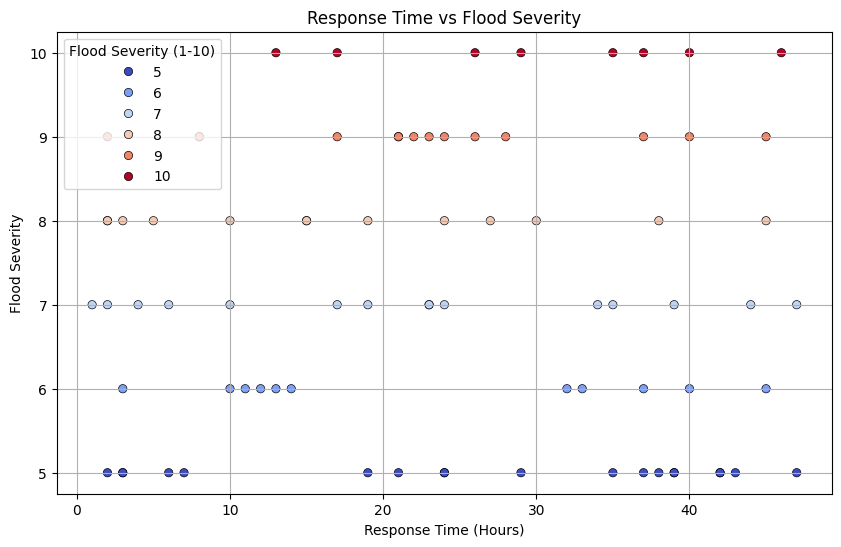

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Response Time (Hours)', y='Flood Severity (1-10)', hue='Flood Severity (1-10)', palette='coolwarm', edgecolor='k')
plt.title('Response Time vs Flood Severity')
plt.xlabel('Response Time (Hours)')
plt.ylabel('Flood Severity')
plt.grid(True)
plt.show()


### Simulated Impact of Response Time and Resource Wastage on Flood Severity ### 

In this section, we simulate the effects of **reducing response time and resource wastage** on **flood severity** to analyze potential improvements in disaster response.  

- We create a **simulated dataset** (`data_simulated`) by modifying two critical factors:  
  - **Response Time (Hours)** is **reduced by 30%** (multiplied by 0.7), simulating a more efficient disaster response.  
  - **Resource Wastage (%)** is **reduced by 50%** (multiplied by 0.5), reflecting better resource allocation.  
- **Flood Severity (1-10)** is then **recalculated** using the following impact formula:  
  - **Severity is reduced** based on the reduced response time (`0.1` weight) and reduced resource wastage (`0.05` weight).  
  - The values are **clipped between 1 and 10** to maintain realistic severity scores.  

- **X-axis:** **Response Time (Hours)** after improvements.  
- **Y-axis:** **Flood Severity (1-10)** after simulation.  
- **Hue:** Color-coded flood severity to observe changes visually.  
- **Title:** Highlights that this plot represents an **optimized response scenario**.  

- **Lower Response Time → Lower Severity:**  
  - If points shift **downward**, it confirms that quicker response times **help reduce flood severity**.  
- **Comparing Before vs. After:**  
  - Comparing this scatter plot with the previous **"Response Time vs. Flood Severity"** plot shows how better emergency management could **mitigate disaster impacts**.  
- **Outliers & Edge Cases:**  
  - Some regions may still experience **high severity despite faster response**, suggesting **other contributing factors (e.g., infrastructure, rainfall levels)**.  

This simulation highlights the **importance of disaster response efficiency** and provides a **data-driven argument for improving emergency protocols**. 

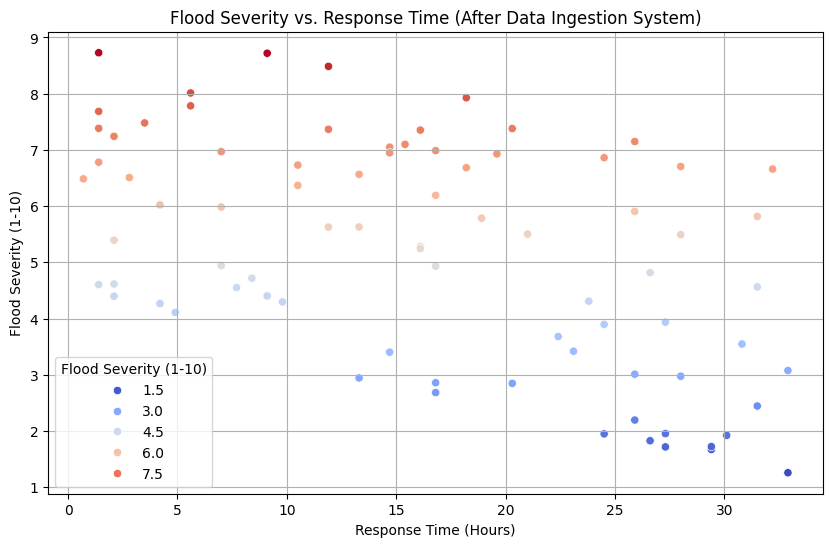

In [13]:
data_simulated = data.copy()

data_simulated['Response Time (Hours)'] = data_simulated['Response Time (Hours)'] * 0.7 
data_simulated['Resource Wastage (%)'] = data_simulated['Resource Wastage (%)'] * 0.5 

data_simulated['Flood Severity (1-10)'] = data_simulated['Flood Severity (1-10)'] - (data_simulated['Response Time (Hours)'] * 0.1 + data_simulated['Resource Wastage (%)'] * 0.05)

data_simulated['Flood Severity (1-10)'] = data_simulated['Flood Severity (1-10)'].clip(1, 10)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Response Time (Hours)', y='Flood Severity (1-10)', data=data_simulated, hue='Flood Severity (1-10)', palette='coolwarm')
plt.title('Flood Severity vs. Response Time (After Data Ingestion System)')
plt.xlabel('Response Time (Hours)')
plt.ylabel('Flood Severity (1-10)')
plt.grid(True)
plt.show()

#### Depicting the change in dataframe after reducing the Response time and Resource wastage and how it affects Flood Severity ##

In [14]:
import numpy as np

optimized_data = data.copy()

optimized_response_time = data['Response Time (Hours)'] * 0.5
optimized_resource_wastage = data['Resource Wastage (%)'] * 0.5

optimized_flood_severity = data['Flood Severity (1-10)'] - ((data['Response Time (Hours)'] - optimized_response_time) * 0.05 + 
                                                             data['Resource Wastage (%)'] * 0.05)

optimized_flood_severity = optimized_flood_severity.clip(1,10)

optimized_data = data.copy()
optimized_data['Optimized Response Time'] = optimized_response_time
optimized_data['Optimized Resource Wastage'] = optimized_resource_wastage
optimized_data['Optimized Flood Severity'] = optimized_flood_severity

optimized_data.head()


,Location,Latitude,Longitude,Elevation (m),Land Use Type,Flood Severity (1-10),Population Density (people/sq.km),Vulnerable Population (%),Rainfall (mm),Water Level Rise (m),...,Food Supply (Tons),Water Supply (Liters),Evacuation Boats,Medical Aid Kits,Relief Camps Set Up,Hospital Functionality (%),Emergency Shelters Capacity,Optimized Response Time,Optimized Resource Wastage,Optimized Flood Severity
0,Location_1,19.018344,72.826646,26,Residential,5,12164,34.26,1487,1.77,...,3445,933469,46,86,80,64.67,1143,19.5,6.305,3.3945
1,Location_2,19.049011,72.886861,46,Slum,9,20177,58.69,1302,1.48,...,266,218072,42,963,39,51.67,3142,4.0,13.120,7.4880
2,Location_3,19.083245,72.770745,15,Industrial,8,24841,10.41,2849,2.85,...,3366,258029,12,742,45,90.79,914,22.5,5.710,6.3040
3,Location_4,19.071166,72.889383,5,Commercial,5,29794,54.94,1026,1.20,...,1409,219047,1,914,78,72.52,5722,12.0,9.205,3.4795
4,Location_5,18.992856,72.770615,32,Slum,9,26509,56.56,2165,3.50,...,3824,985491,17,803,81,66.26,7432,14.0,2.210,8.0790


### Comparing Flood Severity Distribution: Before vs. After Optimization  

In this section, we compare the **original flood severity distribution** with the **optimized flood severity distribution** to assess the impact of response time and resource wastage improvements.  

- We create **two histograms** side by side:  
  - **Left Plot:** **Original Flood Severity Distribution** (before optimization).  
  - **Right Plot:** **Optimized Flood Severity Distribution** (after reducing response time and resource wastage).  
- **Kernel Density Estimation (KDE):** The smooth curve overlaying the histogram helps visualize the underlying distribution trends.  
- **Color Coding:**  
  - **Red (Original Severity):** Represents the initial flood severity values.  
  - **Green (Optimized Severity):** Represents the flood severity after implementing the improved response model.  
  
- **Severity Reduction:**  
  - If the **green histogram shifts leftward (towards lower severity values)**, it confirms that **faster response and better resource management** help reduce flood severity.  
- **Distribution Shape Comparison:**  
  - The **original severity distribution** may be **wider** with higher peak values, indicating **severe flood impacts**.  
  - The **optimized severity distribution** should show **lower peaks at high severity levels**, demonstrating the **mitigating effect of improved disaster response**.  
- **Tail Behavior (Extreme Events):**  
  - If the **green distribution has fewer extreme values (severity 9-10)**, it suggests that optimized response measures are effective in **preventing catastrophic floods**.  
  - If some **high-severity cases persist**, it indicates that factors beyond response time and resource efficiency (e.g., rainfall, infrastructure vulnerability) play a major role.  

This analysis **validates** whether our **proposed optimizations effectively reduce flood severity**, offering **data-driven support for policy decisions** in disaster management. 

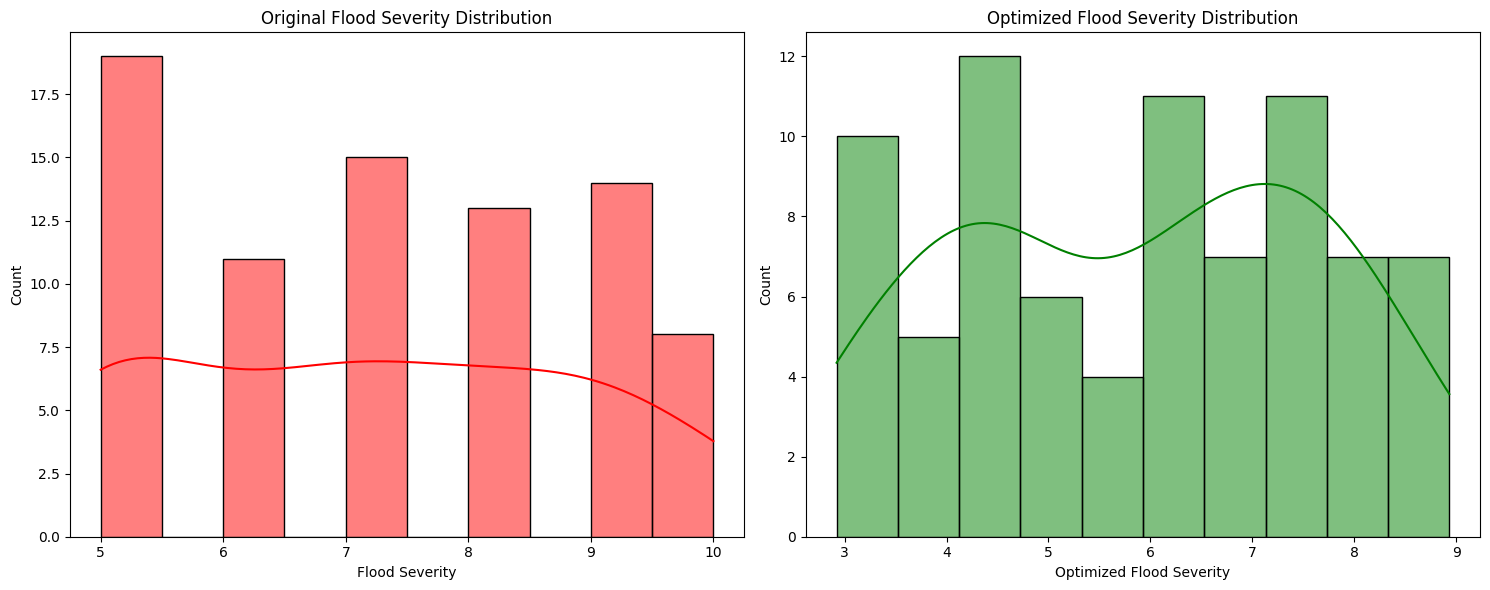

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.histplot(data['Flood Severity (1-10)'], bins=10, kde=True, ax=ax[0], color='red')
ax[0].set_title("Original Flood Severity Distribution")
ax[0].set_xlabel("Flood Severity")

sns.histplot(optimized_data['Optimized Flood Severity'], bins=10, kde=True, ax=ax[1], color='green')
ax[1].set_title("Optimized Flood Severity Distribution")
ax[1].set_xlabel("Optimized Flood Severity")

plt.tight_layout()
plt.show()


##### Importing Libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Making a xgboost model for predicting the flood severity

In [16]:
X = data.drop(columns=['Flood Severity (1-10)', 'Location'])
y = data['Flood Severity (1-10)']

In [17]:
label_encoder = LabelEncoder()
X['Land Use Type'] = label_encoder.fit_transform(X['Land Use Type'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85 , test_size=0.15, random_state=42)

In [19]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (68, 27)
Testing features shape: (12, 27)
Training target shape: (68,)
Testing target shape: (12,)


In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report, mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'n_estimators': [50, 100, 200 , 300 , 400 , 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15 , 0.2 , 0.25]
}

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2,
                                           0.25],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [45]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.7932213480532937
R-squared: -0.8770580291748047


In [38]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model MSE:", mse_best)
print("Best Model R-squared:", r2_best)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Model MSE: 3.7932213480532937
Best Model R-squared: -0.8770580291748047


### Feature Importance Analysis: Key Drivers of Flood Severity  

In this section, we analyze the **importance of different features** in predicting flood severity using our trained model.  

- The model assigns **importance scores** to each feature, reflecting its contribution to predicting **Flood Severity (1-10)**.  
- We extract the **feature importance values** from the trained model (`model.feature_importances_`) and store them in a DataFrame.  
- The DataFrame is **sorted in descending order**, so the most influential features appear at the top.  
- A **horizontal bar chart** is used to visualize the impact of each feature.  

- **Top Features:**  
  - The highest-ranked features have the **strongest predictive power** for flood severity.  
  - For example, **"Rainfall (mm)", "Water Level Rise (m)", and "Infrastructure Damage (Million $)"** might have high importance.  
- **Lower Importance Features:**  
  - Features with low importance scores have **minimal influence** on flood severity and could potentially be dropped to simplify the model.  
- **Impact on Model Optimization:**  
  - If certain features are found to be **redundant**, we can perform **feature selection** to improve model efficiency.  
  - If some features are highly correlated (from our **correlation heatmap analysis**), **dimensionality reduction (e.g., PCA)** might be useful.  

This feature importance analysis helps identify the **key driving factors behind flood severity**, guiding both **disaster response strategies** and **model improvements**. 

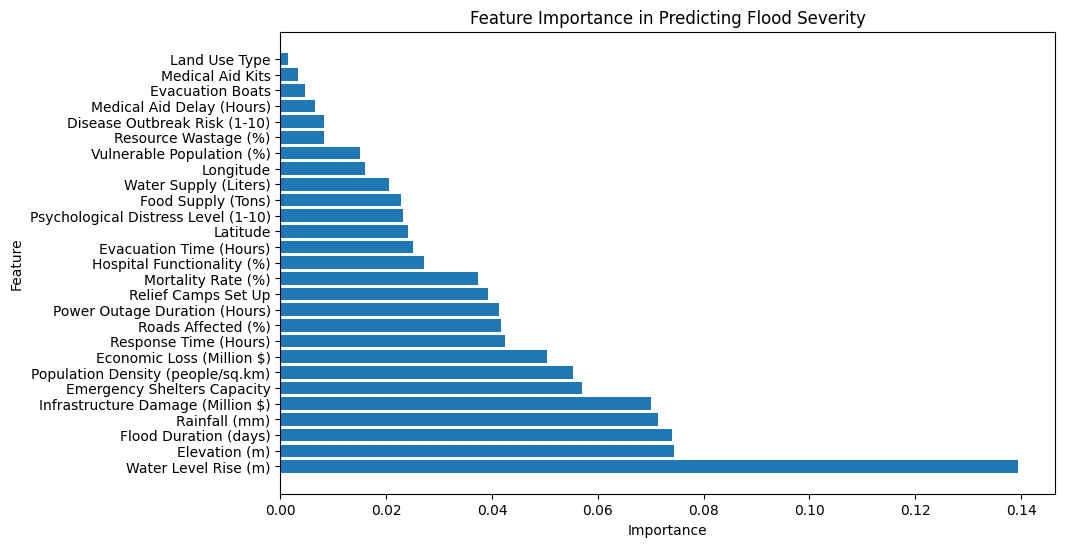

In [46]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Flood Severity')
plt.show()

### Model Performance: Actual vs. Predicted Flood Severity

In this section, we evaluate the **performance of our flood severity prediction model** by comparing its predictions against actual values.  

- **Scatter Plot:**  
  - Each point represents a single prediction where:  
    - **X-axis:** Actual flood severity values (**y_test**)  
    - **Y-axis:** Predicted flood severity values (**y_pred**)  
- **Red Dashed Line (`y = x`)**  
  - This line represents a **perfect prediction** scenario where actual and predicted values are identical.  
  - The closer the points are to this line, the **better the model's accuracy**.  

- **Perfect Predictions:**  
  - Points **aligned closely along the red dashed line** indicate **accurate model predictions**.  
- **Overestimation vs. Underestimation:**  
  - If points lie **above** the red line, the model **overestimated flood severity**.  
  - If points lie **below** the red line, the model **underestimated flood severity**.  
- **Spread & Error Margin:**  
  - A **tight cluster around the red line** suggests a **highly accurate model**.  
  - A **widely scattered distribution** indicates the model **struggles with accuracy** and may require improvements.  
- **Potential Next Steps for Improvement:**  
  - If predictions are **consistently biased (over/underestimating)**, we may need:  
    - Feature engineering to introduce better predictors.  
    - Hyperparameter tuning for model optimization.  
    - Alternative modeling techniques (e.g., ensemble methods).  

This **Actual vs. Predicted** comparison provides a **quick diagnostic check** on the model's effectiveness in forecasting **flood severity**, guiding future improvements. 

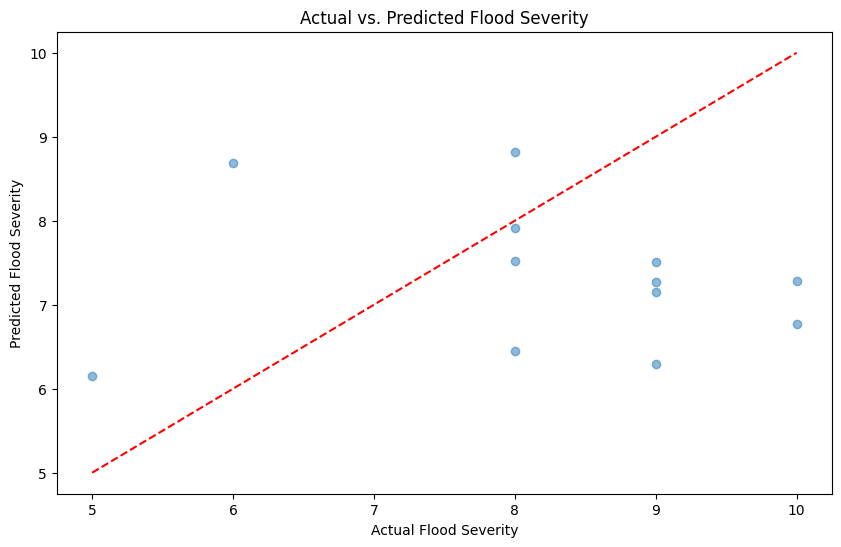

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Flood Severity')
plt.ylabel('Predicted Flood Severity')
plt.title('Actual vs. Predicted Flood Severity')
plt.show()



In this section, we analyze the **residuals** (errors) of the flood severity prediction model to assess its performance and identify potential biases.  

- A **residual** is the difference between the **actual flood severity** and the **predicted severity**:  
  Residual = Actual Value - Predicted Value 
- A well-performing model should have **residuals randomly distributed around zero**, with no clear patterns.  

- **X-axis:** **Predicted Flood Severity** 
- **Y-axis:** **Residuals** (y act - y pred)
- **Red Dashed Line at Zero:**  
  - This line represents **perfect predictions** (no error).  
  - Residuals should be **evenly scattered** around this line if the model is well-calibrated.  
  
- **Random Distribution (Ideal Case):**  
  - If residuals are **randomly scattered around zero**, the model has **no systematic bias**.  
- **Pattern in Residuals (Potential Issues):**  
  - If residuals form a **clear curve or trend**, it suggests the model has **non-linear relationships** that it fails to capture.  
  - A **cone-shaped pattern (increasing spread at higher predictions)** suggests **heteroscedasticity**, meaning the model's error increases with severity.  
- **Bias Detection:**  
  - If most residuals are **above zero**, the model **underestimates flood severity**.  
  - If most residuals are **below zero**, the model **overestimates flood severity**.  
 


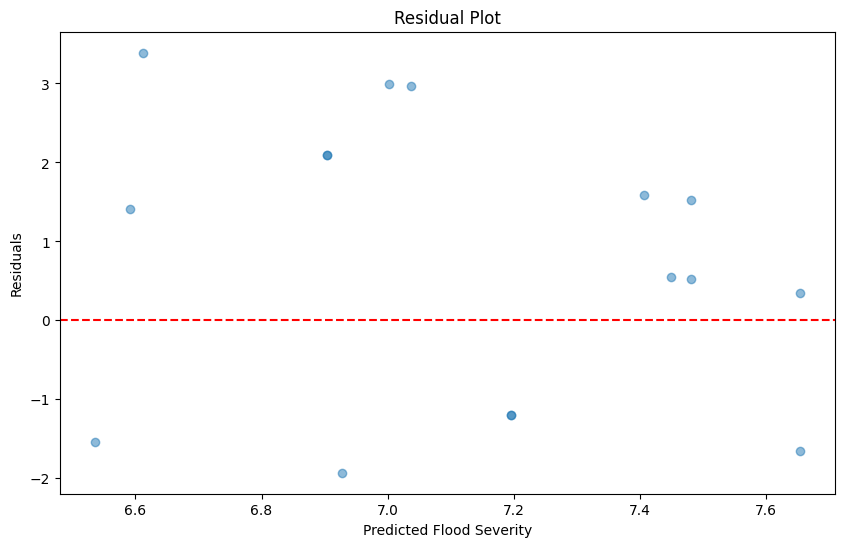

In [51]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Flood Severity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()